# Project proposal: Text mining coronavirus-related news articles

### Martin Řanda & David Černý

The media outlet iDNES.cz [amasses millions of visits every day](https://rating.gemius.com/cz/tree/2), making it one of the most widely used online news sites in the Czech Republic [despite its controversial ownership](https://www.dw.com/en/how-oligarchs-captured-central-europes-media/a-46429120). Since the early days of the COVID-19 pandemic, iDNES has published a countless number of articles on the topic, tagging them all in the process. Therefore, a list of every article related to the pandemic can be accessed via the following link structure:

```
https://www.idnes.cz/zpravy/zahranicni/koronavirus.K466979/<page_number_starting_from_2>
```

This structure makes it possible to, for example, scrape the date off each article and plot the daily count of coronavirus-related articles published each day (as one of us did a while ago: [rnd195/covid_articles](https://github.com/rnd195/covid_articles)), which is demonstrated below.

In [19]:
from urllib.request import urlopen, HTTPError
from bs4 import BeautifulSoup
from pandas import DataFrame
from collections import Counter
from time import sleep
import matplotlib.pyplot as plt


final_list = []

# The end number, 410, changes each day as new articles are published
for pgnum in range(300, 420):
    link = "https://www.idnes.cz/zpravy/zahranicni/koronavirus.K466979/" + str(pgnum)

    try:
        pg = urlopen(link)
    except HTTPError as err:
        print("Incorrect link -", err)

    soup = BeautifulSoup(pg, "html.parser")
    content = soup.find("div", {"id": "list-art-count"})

    # Find dates, strip-off whitespaces and other unwanted content
    for dt in content.findAll("span"):
        if dt.has_attr("datetime"):
            date_time = dt["datetime"]
            # Only the first 10 chars needed for date
            date = date_time[:10]
            final_list.append(date)
    if not pgnum % 10:
        print("Page", pgnum, "completed") 
    sleep(1.1)


Page 300 completed
Page 310 completed
Page 320 completed
Page 330 completed
Page 340 completed
Page 350 completed
Page 360 completed
Page 370 completed
Page 380 completed
Page 390 completed
Page 400 completed
Page 410 completed


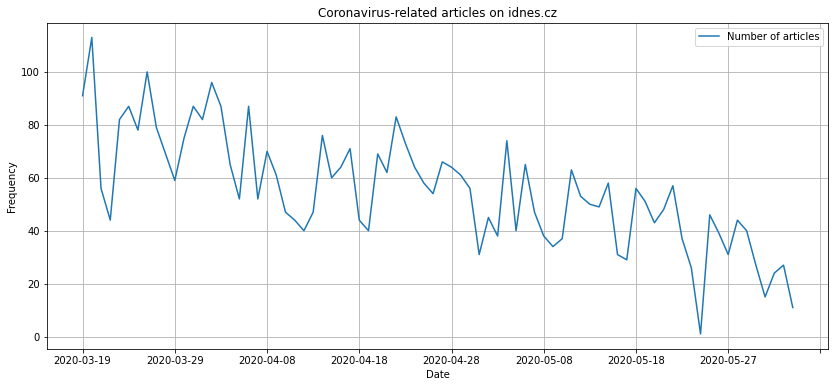

In [20]:
# Count the occurrences of each date which is also the number of articles/day
date_counter = Counter(final_list)
df = DataFrame.from_dict(
    date_counter,
    orient="index",
    columns=["Number of articles"]
)

# Reverse the order of the dataframe
df = df.reindex(index=df.index[::-1])
df.plot(
    kind="line",
    figsize=(14, 6),
    title="Coronavirus-related articles on idnes.cz",
    grid=True,
    xlabel="Date",
    ylabel="Frequency"
)
plt.show()

The idea of this project is to go deeper and focus on the content of the articles—the actual text, title, the author, and so on. After scraping the content of each available article, we would extract and transform the text and apply text mining. This process would include: building a corpus, removing punctuation & stop words, stemming, and other text processing. The transformed text would then be stored in an SQLite database as it wouldn't be wise to store the original content in a public repository for copyright reasons.

The end result would be presented as a set of interactive visualizations that would allow filtering for dates, topics, etc. At the end of this document a simple sketch of what that *could* look like is provided.

Because articles are still being added, we would also design a way to update the database with newer data using a command-line interface.

We believe that the contribution of this project would be two-fold: first, the corpus would provide a unique dataset for others to use in different analyses. Secondly, the methods utilized in this project could be used to generate insights about other topics in the media.

<img src=" 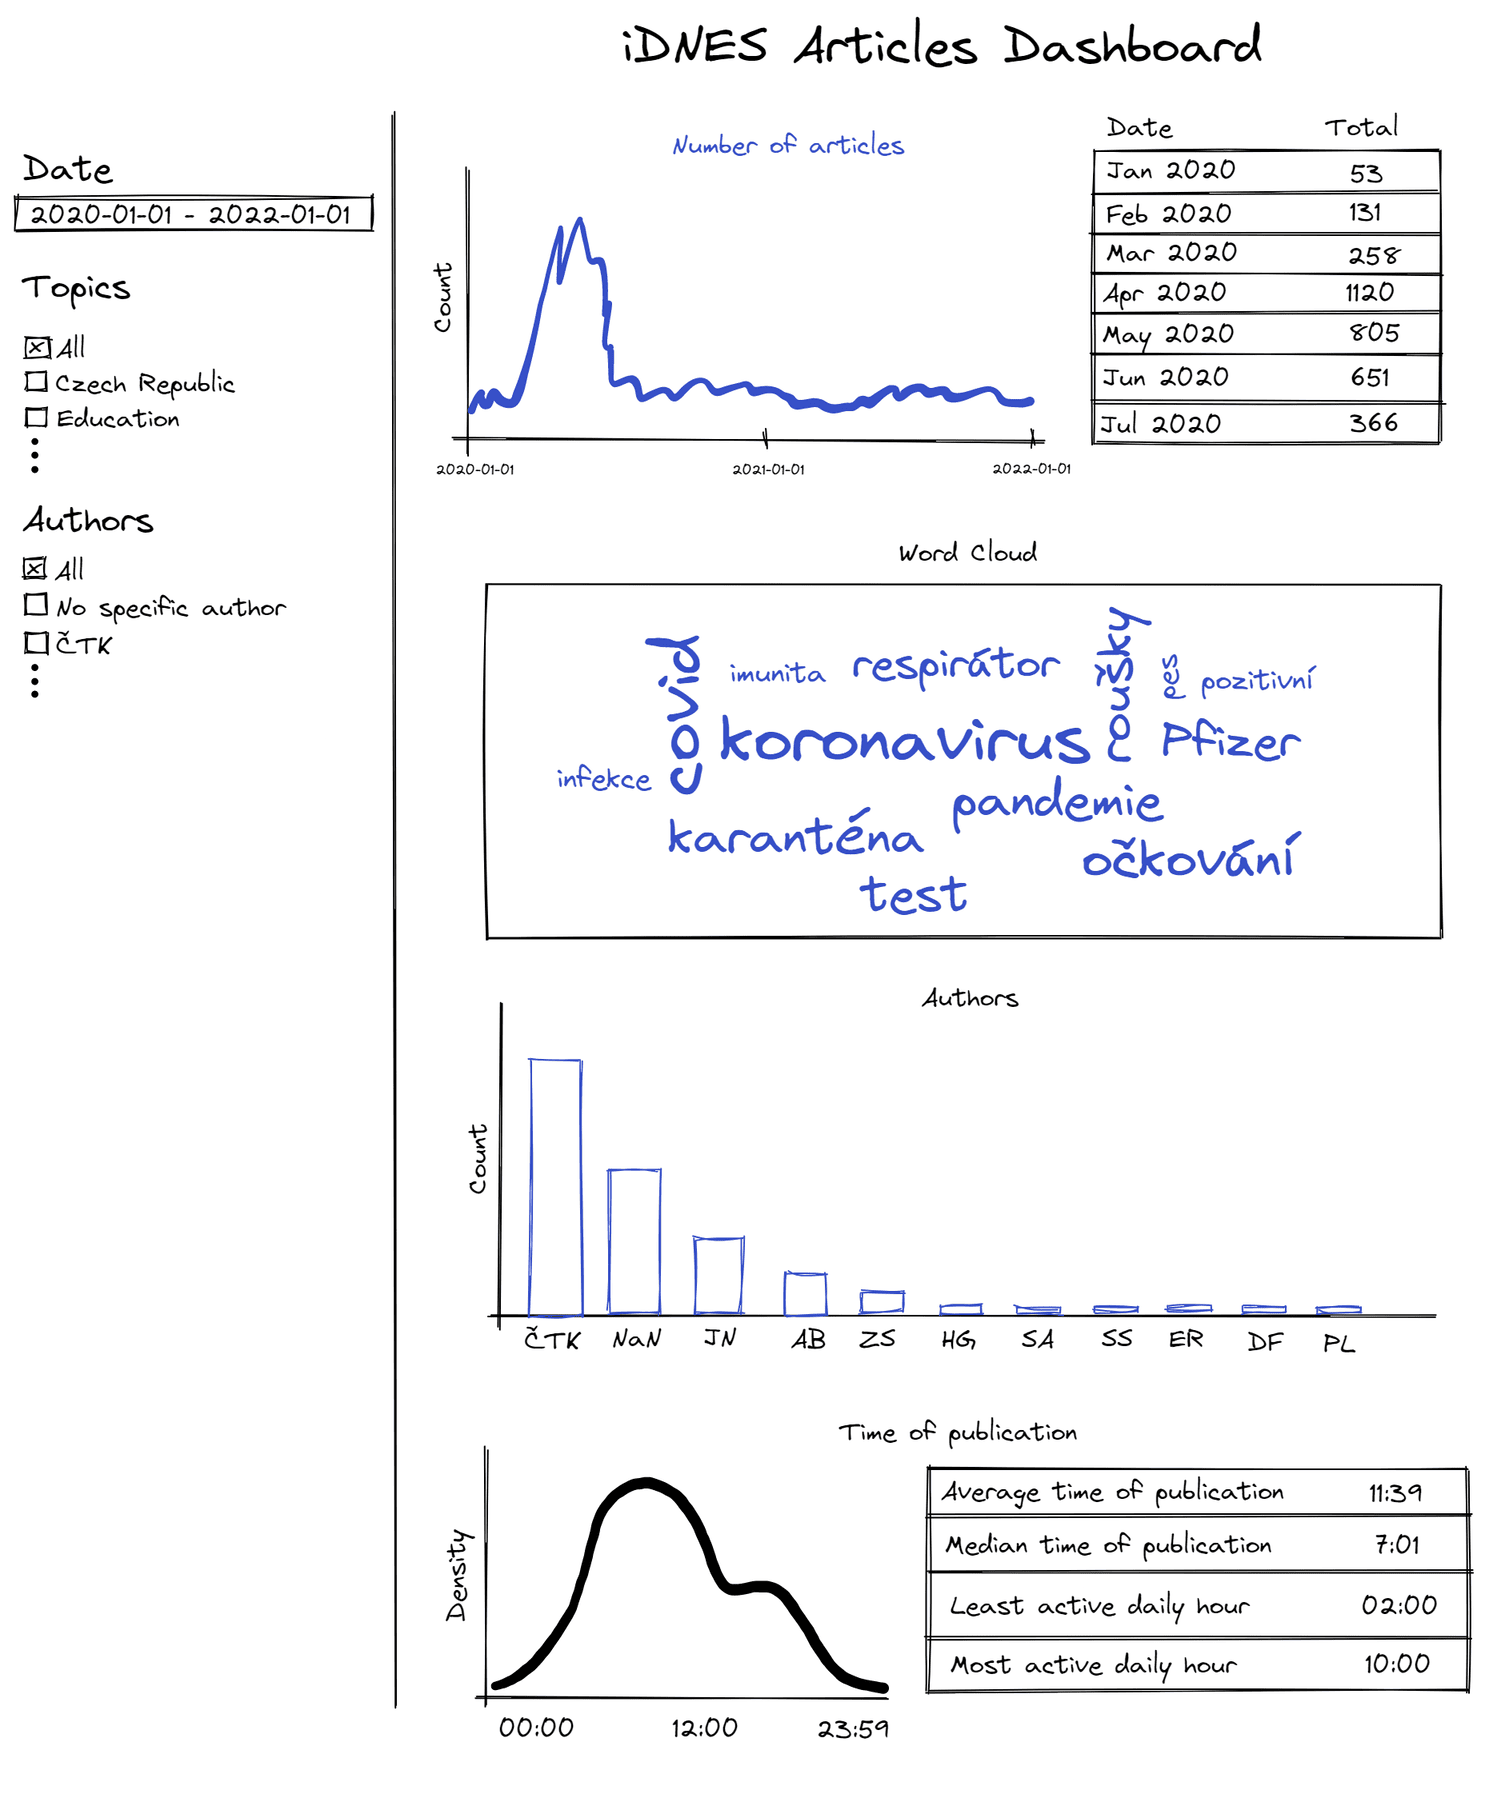" />